In [136]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Grid:
    def __init__(self, size, dx, dy, D,eta):
        self.size = size
        self.grid = np.zeros((size, size))
        self.density = np.zeros((size, size))
        self.is_agar = np.ones((size,size))
        self.dx = dx
        self.dy = dy
        self.D = D
        self.eta = eta
    def set_concentration(self, x, y, concentration):
        self.grid[x][y] = concentration

    def get_concentration(self, x, y):
        return self.grid[x][y]
    
    def diffuse(self, dt):
        new_grid = np.copy(self.grid)
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                if self.is_agar[i][j]:
                    c = self.grid[i][j]
                    c_up = self.grid[i-1][j] if i-1 >= 0 and self.is_agar[i-1][j] else c
                    c_down = self.grid[i+1][j] if i+1 < self.grid.shape[0] and self.is_agar[i+1][j] else c
                    c_left = self.grid[i][j-1] if j-1 >= 0 and self.is_agar[i][j-1]else c
                    c_right = self.grid[i][j+1] if j+1 < self.grid.shape[1] and self.is_agar[i][j+1] else c

                    diff_up = dt*self.D * (c_up - c) / self.dy**2
                    diff_down = dt*self.D * (c_down - c) / self.dy**2
                    diff_left = dt*self.D * (c_left - c) / self.dx**2
                    diff_right = dt*self.D * (c_right - c) / self.dx**2

                    new_grid[i][j] += (diff_up + diff_down + diff_left + diff_right)
                    new_grid[i][j] -= self.eta*self.grid[i][j]*self.density[i][j]
        self.grid = new_grid
    def iterate(self,dt,n):
        for k in range(n):
            self.diffuse(dt)

def init_grid(grid):
    grid.set_concentration(grid.size//2, grid.size//2, 1.0)

def animate(i):
    ax.clear()
    grid.diffuse(0.1)
    ax.matshow(grid.grid, cmap='viridis')
    plt.title("Time: " + str(i))

grid = Grid(5, 1.0, 1.0, 0.01,0.1)
init_grid(grid)

# fig, ax = plt.subplots()
# ani = animation.FuncAnimation(fig, animate, frames=1000)
# plt.show()


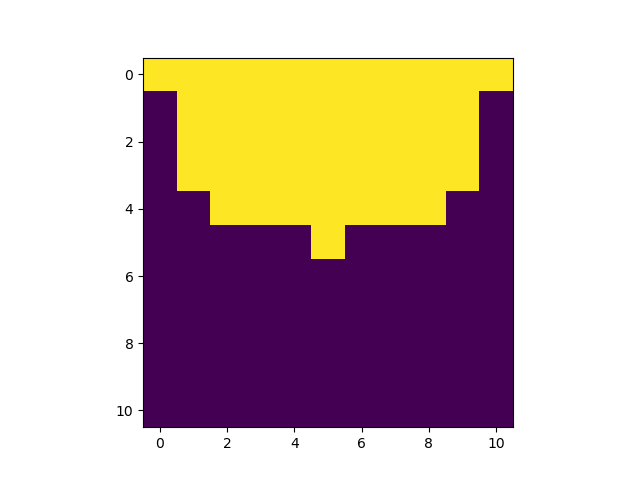

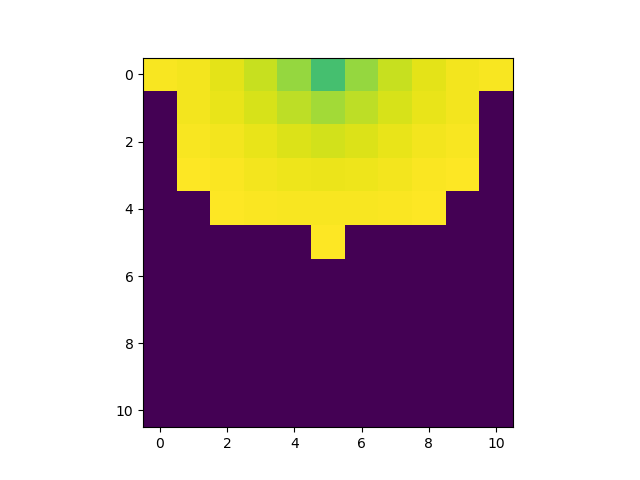

In [161]:
dx = 1 #
dy = 1
D = 1.6e-9*1e6 #mm2.s-1
eta = 1e-1
size = 11
grid = Grid(size, dx, dy, D,eta)
# grid.set_concentration(grid.size//2, 0, 1.0)
grid.grid[:,:]=1.0
x = np.zeros((size, size))
y = np.zeros((size, size))
for i in range(size):
    x[i,:] = i
for j in range(size):
    y[:,j] = j
grid.is_agar = np.sqrt((x-size//2)**2+y**2)<=5
grid.grid = 110*grid.grid *grid.is_agar
grid.density[size//2][0] = 1
fig, ax = plt.subplots()
ax.imshow(grid.grid.T, cmap='viridis')
niterate = 1000
dt = 100
grid.iterate(dt,niterate)
fig, ax = plt.subplots()
ax.imshow(grid.grid.T, cmap='viridis')

In [162]:
1e5/3600

27.77777777777778

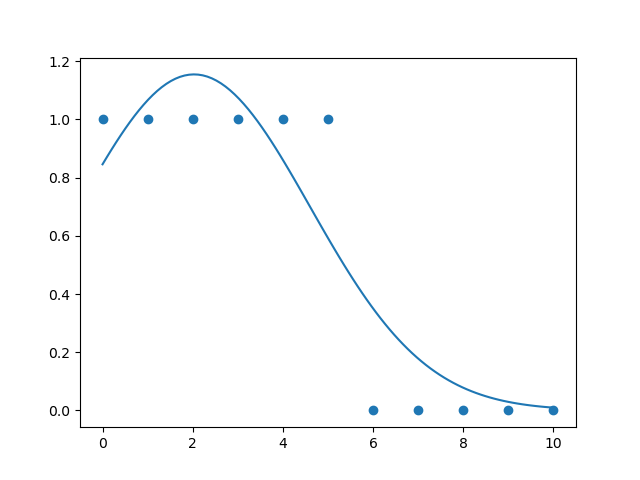

In [142]:
from scipy.optimize import curve_fit
x = dx*np.array(range(size))
y = grid.grid[size//2,:]
params = fit_gaussian(x,y)
fig, ax = plt.subplots()
ax.scatter(x,y)
x0 = dx*np.linspace(0,size-1,100)
ax.plot(x0,gaussian(x0,*params))

In [85]:
abs(params[2])/np.sqrt(D*niterate*dt)

1.2489850761123382

In [75]:
np.sqrt(2)

1.4142135623730951

In [25]:
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# Fit the Gaussian function to a given dataset
def fit_gaussian(x_data, y_data):
    # Provide some initial guess values for a, b, c
    initial_guess = [1, 0, 1]
    
    # Use curve_fit to fit the gaussian function to our data
    params, params_covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)
    
    return params

-0.4658880279275714

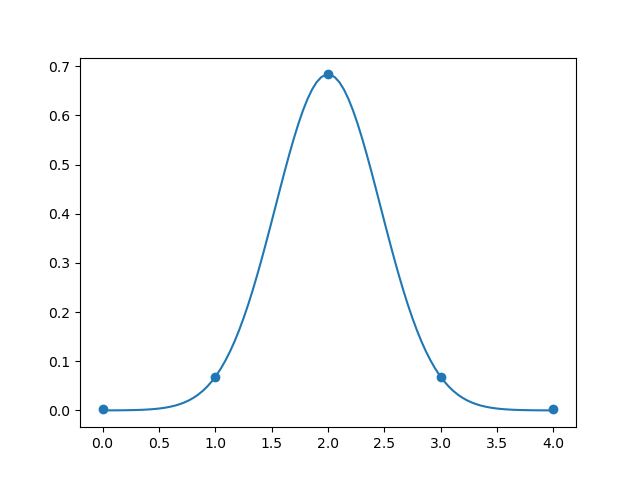